In [3]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt
import networkx as nx
from random import random,choice,sample

In [4]:
data=np.genfromtxt("example.txt", delimiter='  ',dtype=int)
G = nx.Graph()
G.add_edges_from(data)


In [34]:
N = 100
b = 0.1
g = 0.05
S0, I0, R0 = 0.95, 0.05, 0
max_time = 200
times = [0,200,2001]

In [39]:
def sir_model(N, b, g, S0, I0, R0, max_time):
    St=[]
    It=[]
    Rt=[]
    for day in range(max_time):
        if day == 0: 
            ilist=sample(list(G.nodes()), int(I0*N))
            rlist = []
            slist = [x for x in list(G.nodes()) if x not in ilist and x not in rlist]
        else:
            for node in list(G.nodes()):
                if node in slist:       
                    nb = choice(list(G.nodes()))
                    if nb in ilist:       
                        if random() <= b: 
                            ilist.append(node)
                            slist.remove(node)
                elif node in ilist:
                    if random() <= g:
                        ilist.remove(node)
                        rlist.append(node)
        It.append(len(ilist)/N)
        Rt.append(len(rlist)/N)
        St.append(len(slist)/N)
    return(St, It, Rt)


In [51]:
s50=[]
i50=[]
r50=[]
for i in range(50):
    S,I,R=sir_model(N,b,g,S0,I0,R0,max_time)
    s50.append(S)
    i50.append(I)
    r50.append(R)

sir_out=pd.DataFrame({"t":list(range(1,max_time+1)),"S":[sum(x)/50 for x in zip(*s50)],"I":[sum(x)/50 for x in zip(*i50)],"R":[sum(x)/50 for x in zip(*r50)]})

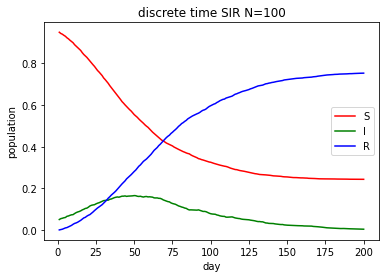

In [52]:
plt.plot('t','S', color='red', data=sir_out)
plt.plot('t','I', color='green',data=sir_out)
plt.plot('t','R', color='blue',data=sir_out)
plt.title("discrete time SIR N=100")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend()

In [45]:
G2=nx.complete_graph(1000, create_using=None)

In [54]:
s50=[]
i50=[]
r50=[]
for i in range(50):
    S,I,R=sir_model(N=1000, b=0.1, g=0.05, S0=0.95, I0=0.05, R0 =0, max_time=200)
    s50.append(S)
    i50.append(I)
    r50.append(R)
sir_out=pd.DataFrame({"t":list(range(1,max_time+1)),"S":[sum(x)/50 for x in zip(*s50)],"I":[sum(x)/50 for x in zip(*i50)],"R":[sum(x)/50 for x in zip(*r50)]})

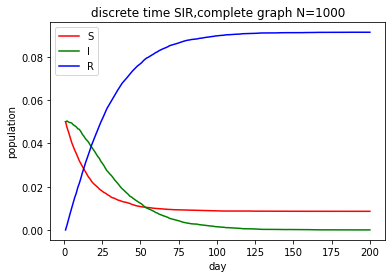

In [55]:
plt.plot('t','S', color='red', data=sir_out)
plt.plot('t','I', color='green',data=sir_out)
plt.plot('t','R', color='blue',data=sir_out)
plt.title("discrete time SIR,complete graph N=1000")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend()